In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
# from pyrolite.plot import pyroplot
import matplotlib.pyplot as plt
import ternary
from pylab import rcParams
# import pyrolite.comp
from sklearn.preprocessing import scale
import matplotlib
matplotlib.use("Agg")
%matplotlib inline

In [4]:
filename = '210210_Quellaveco_Apatite_Laser.csv' # Insert filename to read here
laser = pd.read_csv(filename)

# Import spreadsheet with chondrite normalised values
CI_norm = pd.read_csv('CI_norm.csv')
CI_norm = CI_norm.drop(['Pm_ppm'], axis = 1) # Drop Pm

# Select the REEs from your df, each of these is one column
REEs = laser[['La139_ppm','Ce140_ppm','Pr141_ppm','Nd145_ppm','Sm147_ppm','Eu151_ppm','Gd157_ppm','Tb159_ppm','Dy163_ppm','Ho165_ppm','Er167_ppm',
             'Tm169_ppm','Yb173_ppm','Lu175_ppm']]

REEs = REEs.div(CI_norm.values[0], axis = 1) # chondrite normalise them
REEs.insert(4, 'Pm_ppm', np.sqrt(REEs['Nd145_ppm']*REEs['Sm147_ppm'])) # Make Pm as a gap
REEs = pd.concat([REEs,laser['Sample'],laser['Unit']], axis = 1) # metadata is in sample and unit columns
REEs.columns = ['La','Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho',
                'Er','Tm','Yb','Lu','Sample Number','Unit']
REE_names = ['La','Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho',
                'Er','Tm','Yb','Lu']

#Creating a category that can be sorted by manually so we get the plots in custom (age) order
REEs['Sample Number'] = pd.Categorical(REEs['Sample Number'], ['QVC075','QVC083','QVC082','QVC028','QVC091',
               'QVC034','QVC060','QVC024', 'QVC061','QVC029','QVC040'])
REEs = REEs.sort_values("Sample Number") # sort the table by sample number
formation_group = REEs.groupby('Sample Number') # group the data frame by whichever data you want to separate the plots
REE_index = np.linspace(0, len(REEs.columns)-3, num = len(REEs.columns)-2) # index for REEs for plotting
REE_index = np.delete(REE_index, 4)

/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_12616/2887702805.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  group3 = group3.drop('Pm', 1) # Dont want symbol for Pm
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_12616/2887702805.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  group3 = group3.drop('Pm', 1) # Dont want symbol for Pm
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_12616/2887702805.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  group3 = group3.drop('Pm', 1) # Dont want symbol for Pm
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_12616/2887702805.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argume

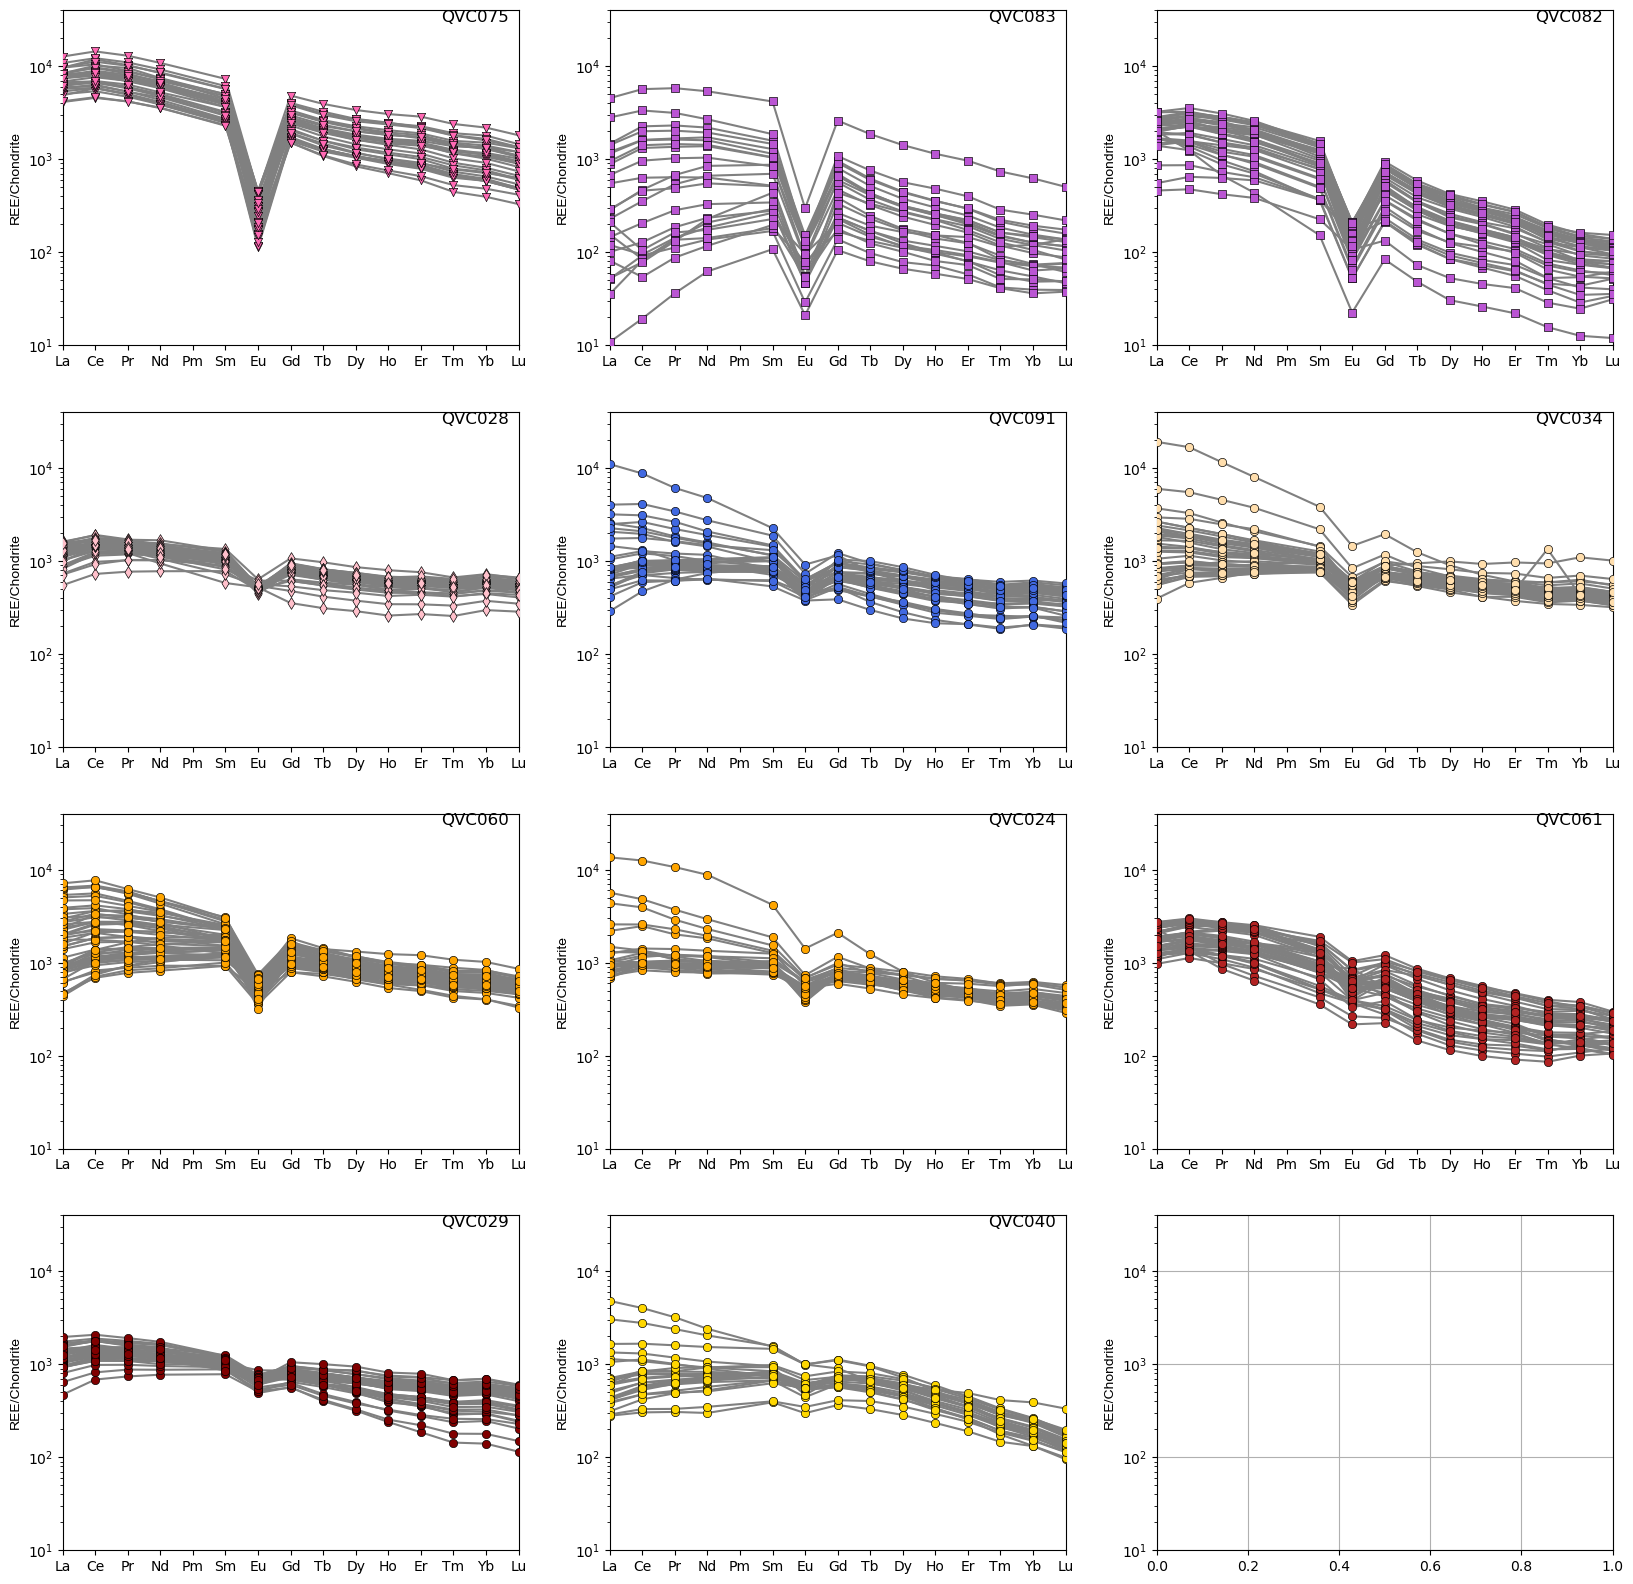

In [5]:
# I define dictionaries here to choose what colour and shape to plot for each unit

colour_dict = {'Toquepala Granodiorite':'mediumorchid','Yarabamba Monzonite':'hotpink',
              'Quellaveco Granodiorite':'pink',
               'Granodiorite Porphyry':'royalblue','Early Porphyry':'navajowhite','Intermineral Monzonite':'orange',
              'Monzodiorite':'firebrick','Late Porphyry':'maroon',
              'Dacite Dyke':'gold'}
shape_dict = {'Toquepala Granodiorite':'s','Yarabamba Monzonite':'v','Quellaveco Granodiorite':'d',
               'Granodiorite Porphyry':'o','Early Porphyry':'o','Intermineral Monzonite':'o',
              'Monzodiorite':'o','Late Porphyry':'o',
              'Dacite Dyke':'o'}


# Make plots
fig, axs = plt.subplots(4,3, figsize = (20,20)) # define number of subplots
axr = axs.ravel()
j = 0

for name, group1 in formation_group:
    group2 = group1.iloc[:, 0:-1] # Remove last column (formation)
    # We use pandas parallel coordinates to plot the REE lines
    pd.plotting.parallel_coordinates(group2, 'Sample Number', axvlines = False, ax = axr[j], color = 'grey')
    axr[j].get_legend().remove() # No legend needed
    group3 = group2.iloc[:, 0:-1] # Remove last column (formation)
    group3 = group3.drop('Pm', 1) # Dont want symbol for Pm
    for (index1, a1), (index2, a2) in zip(group3.iterrows(), group1.iterrows()):
        a1 = pd.Series(a1)
        color = colour_dict.get(a2['Unit']) 
        shape = shape_dict.get(a2['Unit'])
        # This plots symbols for the individual REEs
        sb.scatterplot(x = REE_index, y = a1,ax = axr[j], legend = False, color = color, zorder=1000,
        edgecolor = 'black', alpha = 1, marker = shape) 
    j = j + 1

plot_labels = ['QVC075','QVC083','QVC082','QVC028','QVC091',
               'QVC034','QVC060','QVC024', 'QVC061','QVC029','QVC040']

# Adjust each subplot accordingly 
for i, axis in enumerate(axr.flat):
    try: # The ignored axis keeps raising an error so using a try, except to skip the error
        axis.set_ylabel('REE/Chondrite', fontname="Arial")
        axis.set_yscale('log')
        axis.set_ylim([10,40000])
        axis.grid(b=None)
        axis.text(13.7,30000, plot_labels[i], ha='right', fontsize = '12')
    except:
        pass
#     axis.set_xticklabels(labels = REE_names, rotation=90)
    
plt.show()